Program Assignment 1 Machine Learning
2023-2024 odd
Create a machine-learning model based on the dataset that has been assigned to you.
You can choose either regression or classification problems on the given dataset. Your
jupyter notebook submission should include:
1. Problem and Task Understanding (30 points): Explain the problem you want to
solve, and be specific about the machine learning task, whether it is a classification
problem or regression problem.
2. Data Preprocessing (10 points): Explain what are the preprocessing techniques
that you apply and why you need these techniques
3. Data Analysis (10 points): Explain your understanding of the data pattern. You
can explain the insight that you get from the data
4. Model Generation (30 points): Create your model and describe the algorithm
that you use. Explain why you chose this model
5. Model Evaluation (20 points): Explain the results of your model

Marsha Alexis Likorawung 0706012110034

Evelyn Callista Yaurentius 0706012110036

**1. Problem and Task Understanding (30 points): Explain the problem you want to
solve, and be specific about the machine learning task, whether it is a classification
problem or regression problem.**


Problem and Task Understanding : The problem we want to solve is to predict weather the customer going to churn or not. This problems treated as a classification problem because : 

1. The outcome is binary: which is either the customer churn (Yes/No)
2. Classification algorithm are designed to handle categorical or discrete outcome such as predicting classes or labels
3. The model selection for machine learning would be logistic regression. Logistic prediction is used to predict the dependent variable


**Dataset Customer Churn**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split

# Load the data, from marsha's github (the csv file is imported to github for easier and online access to the dataset)
url = "https://raw.githubusercontent.com/Marsh16/customer-churn/main/Customer%20Churn%20-%20Dataset.csv"
data = pd.read_csv(url)

#show all columns 
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [108]:
(data == ' ').sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [109]:
data[data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [5]:
for i in range(len(data['TotalCharges'])):
    if data['TotalCharges'][i] == ' ':
        data=data.drop(i)


In [6]:
(data == ' ').sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
(data == 0).sum()

customerID             0
gender              3483
SeniorCitizen       5890
Partner             3639
Dependents          4933
tenure                 0
PhoneService         680
MultipleLines       3385
InternetService     2416
OnlineSecurity      3497
OnlineBackup        3087
DeviceProtection    3094
TechSupport         3472
StreamingTV         2809
StreamingMovies     2781
Contract            3875
PaperlessBilling    2864
PaymentMethod       1542
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [15]:
#hi 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  


In [9]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder2 = LabelEncoder()

data['gender'] = label_encoder2.fit_transform(data['gender'])
data['SeniorCitizen'] = label_encoder2.fit_transform(data['SeniorCitizen'])
data['Partner'] = label_encoder2.fit_transform(data['Partner'])
data['Dependents'] = label_encoder2.fit_transform(data['Dependents'])
data['PhoneService'] = label_encoder2.fit_transform(data['PhoneService'])
data['MultipleLines'] = label_encoder2.fit_transform(data['MultipleLines'])
data['InternetService'] = label_encoder2.fit_transform(data['InternetService'])
data['OnlineSecurity'] = label_encoder2.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = label_encoder2.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = label_encoder2.fit_transform(data['DeviceProtection'])
data['TechSupport'] = label_encoder2.fit_transform(data['TechSupport'])
data['StreamingTV'] = label_encoder2.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = label_encoder2.fit_transform(data['StreamingMovies'])
data['Contract'] = label_encoder2.fit_transform(data['Contract'])
data['PaperlessBilling'] = label_encoder2.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = label_encoder2.fit_transform(data['PaymentMethod']) 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data['Churn'] = label_encoder2.fit_transform(data['Churn']) 
                                                                
# Show the plots
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [116]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [16]:
data.drop('customerID', inplace=True, axis=1) 
(data == 0).sum()

gender              3483
SeniorCitizen       5890
Partner             3639
Dependents          4933
tenure                 0
PhoneService         680
MultipleLines       3385
InternetService     2416
OnlineSecurity      3497
OnlineBackup        3087
DeviceProtection    3094
TechSupport         3472
StreamingTV         2809
StreamingMovies     2781
Contract            3875
PaperlessBilling    2864
PaymentMethod       1542
MonthlyCharges         0
TotalCharges           0
Churn               5163
dtype: int64

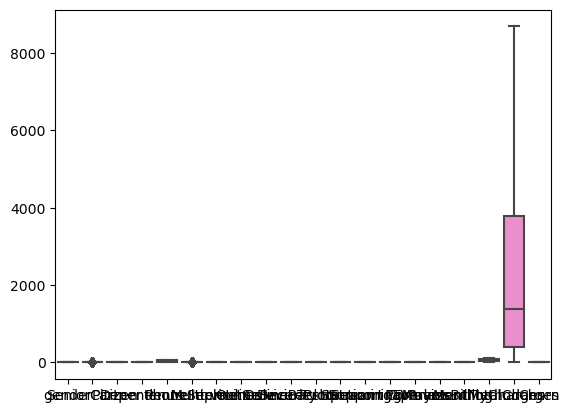

In [157]:
# Fit and transform the categorical data

sns.boxplot(data=data)
plt.show()

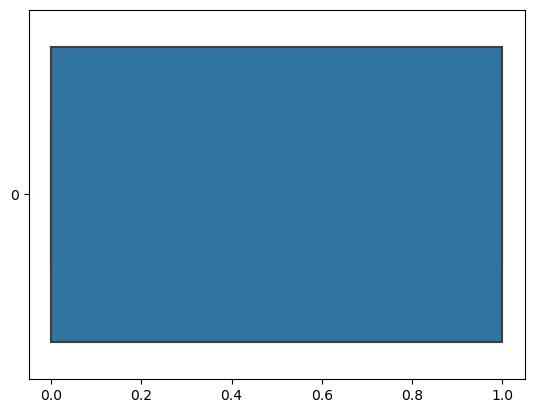

In [158]:
churnDF = data['Churn']
sns.boxplot(data=churnDF , orient='h')
plt.show()

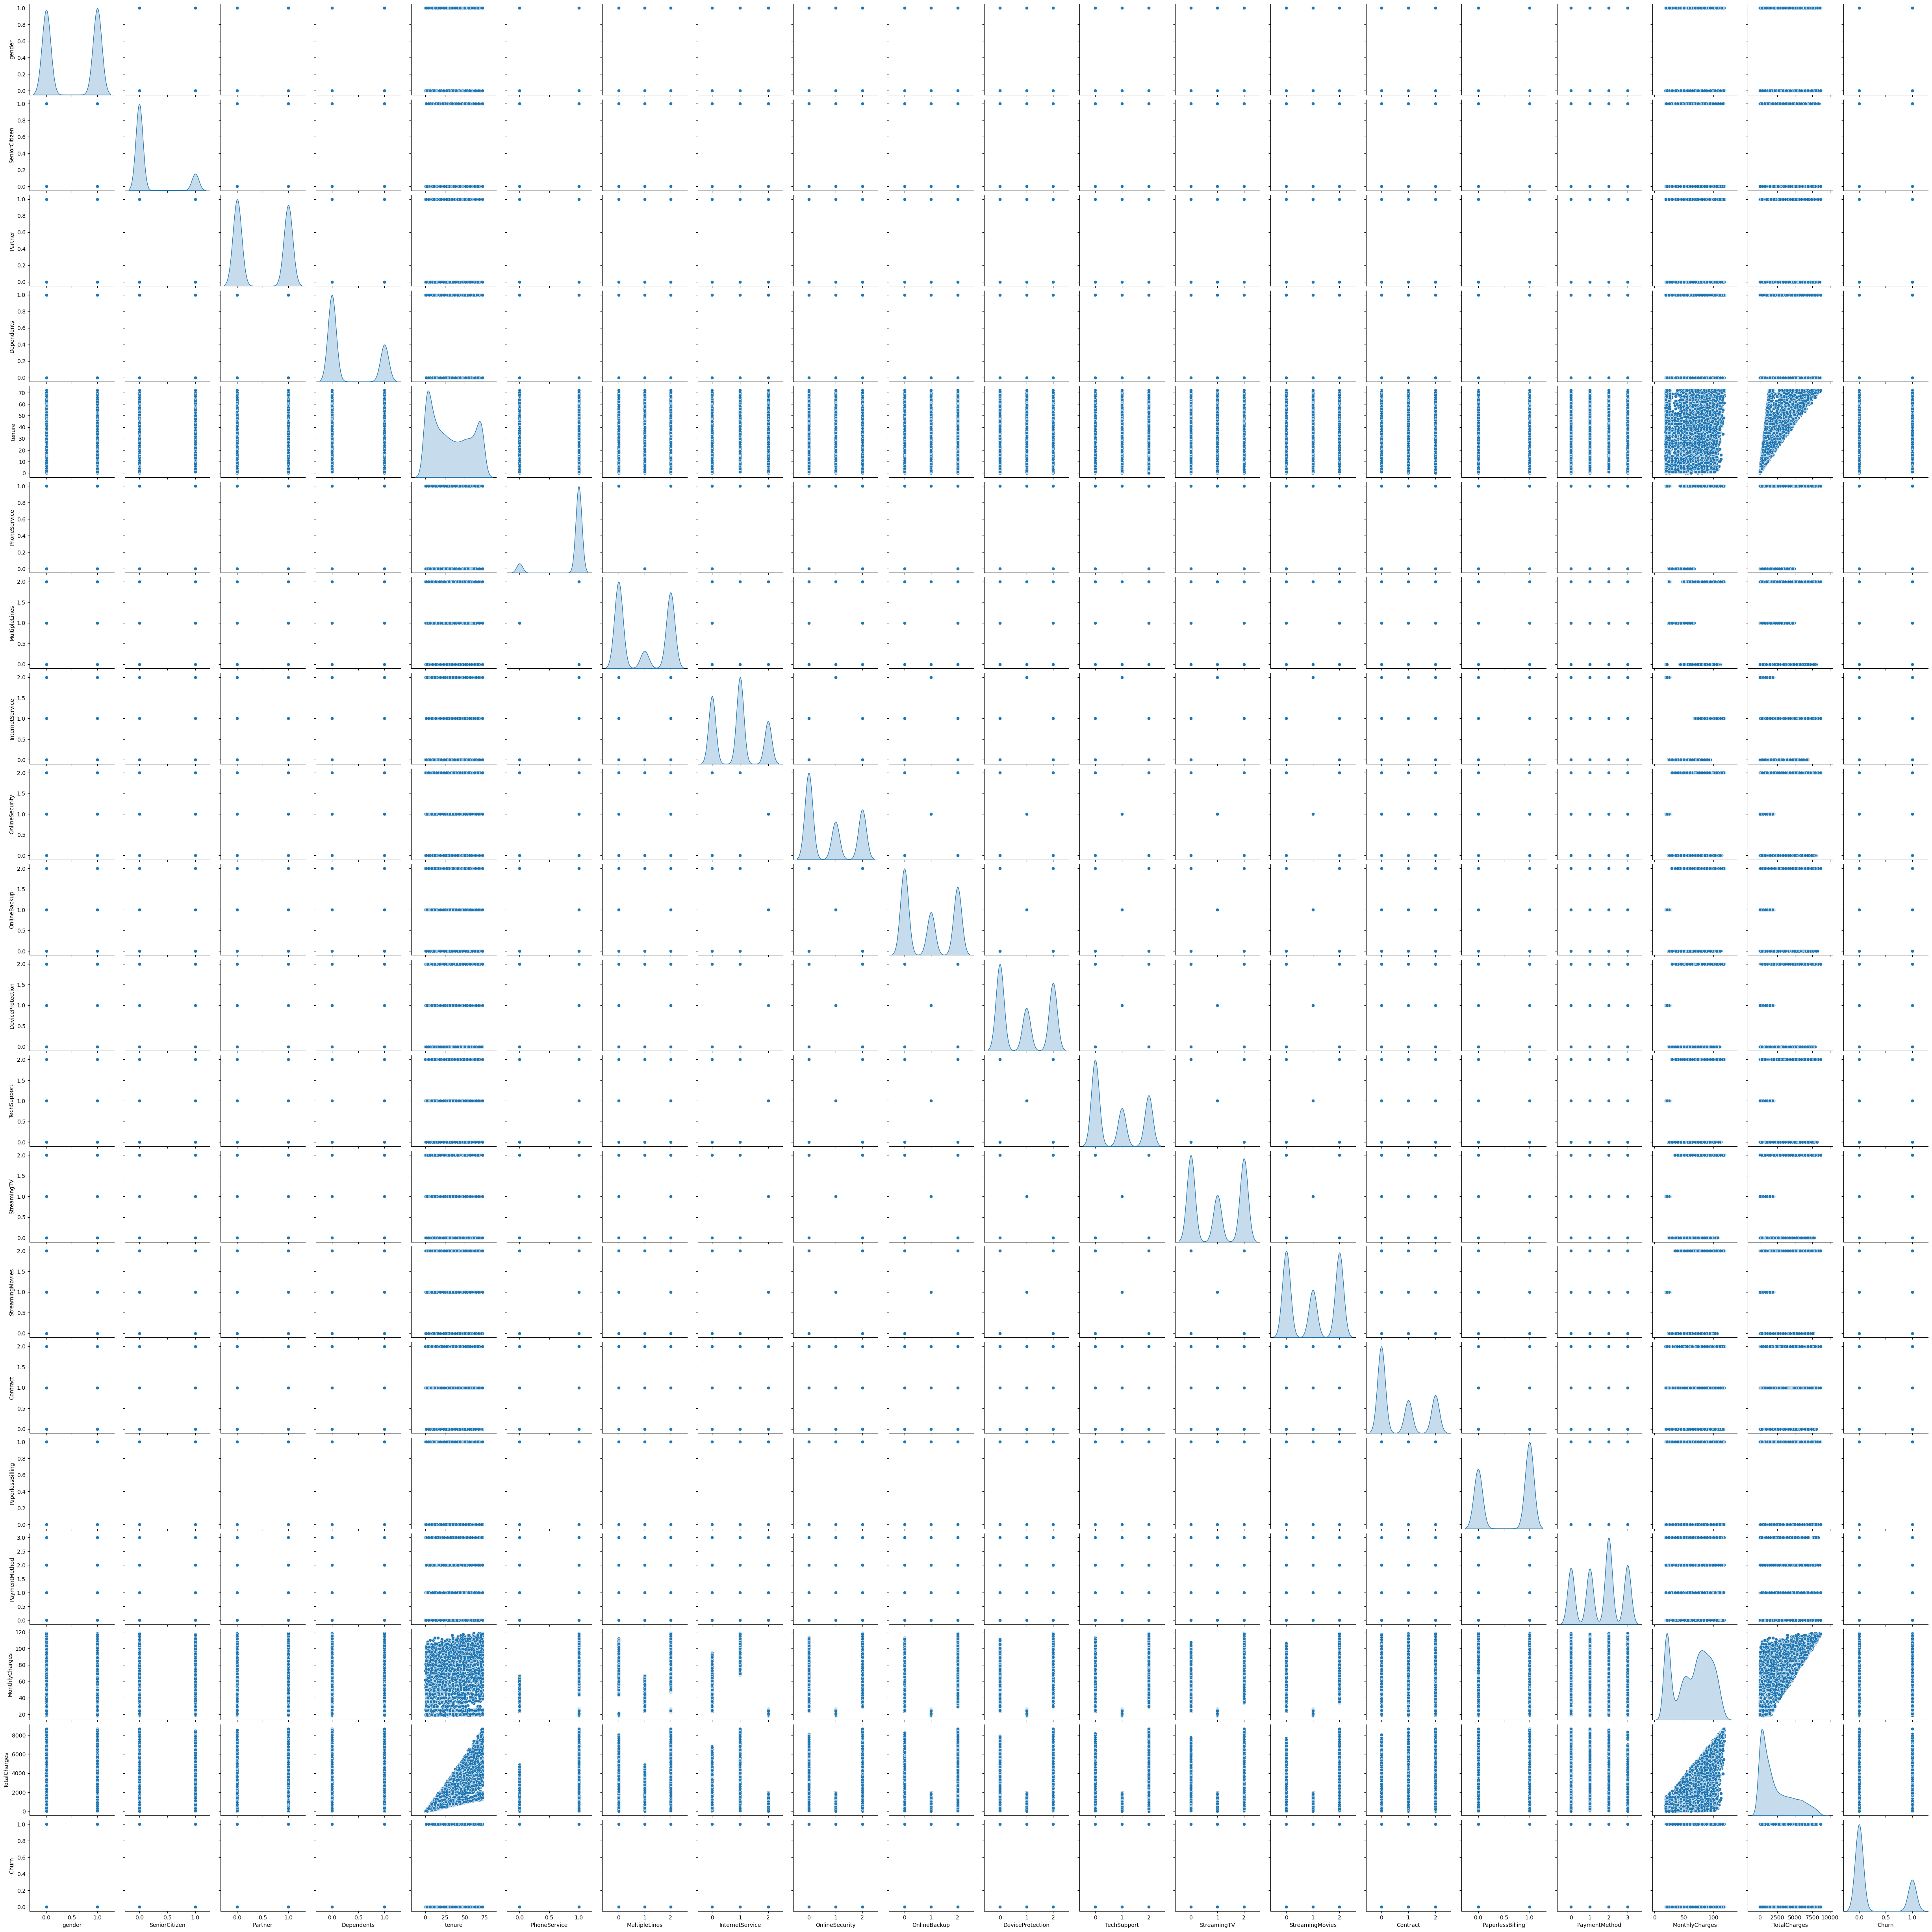

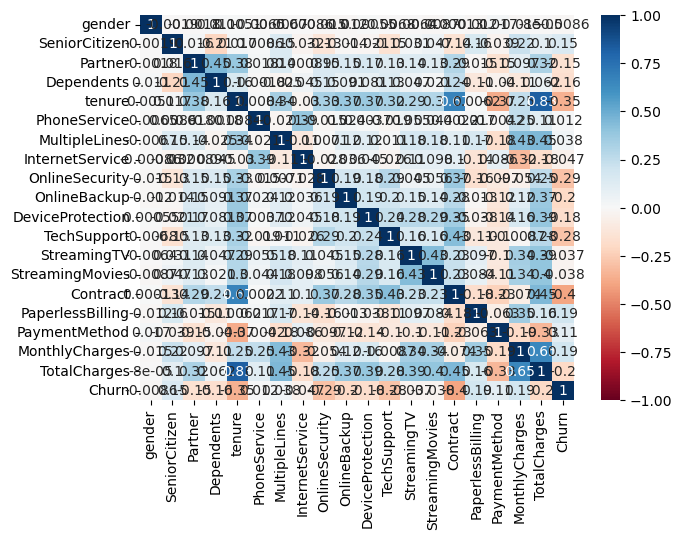

In [159]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

plt.subplots(figsize=(7,5))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

In [118]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print(y)

[0 0 1 ... 0 1 0]


In [119]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [120]:
#Standard Scaler need to be used when the scale are different 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [121]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the logistic regression model
model = LogisticRegression(random_state=16)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [122]:
# Make y prediction based on X test
y_pred = model.predict (X_test)
# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
0,1,1
1,0,0
2,0,0
3,1,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Identifying TP, TN, FP, and FN
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cm)
# Display the accuracy score
print("Accuracy Score: {:0.3f}". format (accuracy_score (y_test, y_pred) ))

Confusion Matrix
 [[1130  152]
 [ 207  269]]
Accuracy Score: 0.796


In [166]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1161,  144],
       [ 195,  261]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

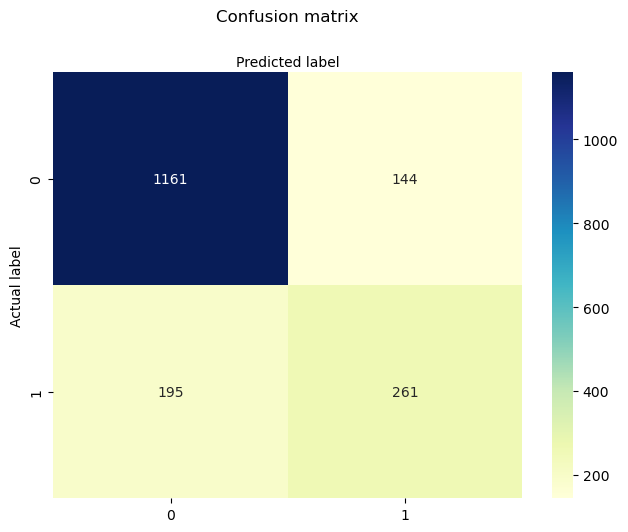

In [167]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [124]:
from sklearn.metrics import classification_report
target_names = ['not churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not churn       0.85      0.88      0.86      1282
       churn       0.64      0.57      0.60       476

    accuracy                           0.80      1758
   macro avg       0.74      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758



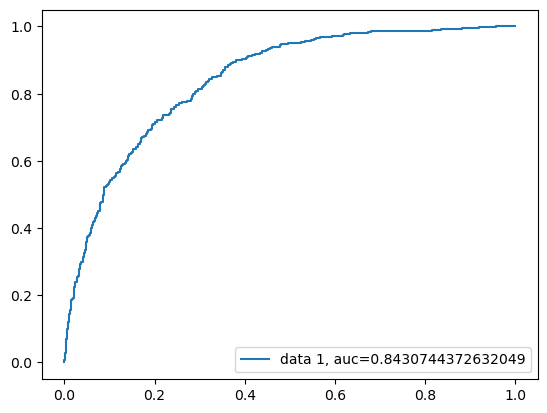

In [125]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [127]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, model.predict_proba(X_test))
logloss
#the lower the better 
# Log Loss around "0.5" considered the classification model reasonable enough

0.42437841864285725

In [59]:
# KNN

In [190]:
# Load the data, from marsha's github (the csv file is imported to github for easier and online access to the dataset)
url = "https://raw.githubusercontent.com/Marsh16/customer-churn/main/Customer%20Churn%20-%20Dataset.csv"
data = pd.read_csv(url)

#show all columns 
pd.set_option('display.max_columns', None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [191]:
for i in range(len(data['TotalCharges'])):
    if data['TotalCharges'][i] == ' ':
        data=data.drop(i)


In [192]:
data.drop('customerID', inplace=True, axis=1) 
(data == 0).sum()

gender                 0
SeniorCitizen       5890
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [193]:
from sklearn.preprocessing import LabelEncoder
label_encoder2 = LabelEncoder()

data['gender'] = label_encoder2.fit_transform(data['gender'])
data['SeniorCitizen'] = label_encoder2.fit_transform(data['SeniorCitizen'])
data['Partner'] = label_encoder2.fit_transform(data['Partner'])
data['Dependents'] = label_encoder2.fit_transform(data['Dependents'])
data['PhoneService'] = label_encoder2.fit_transform(data['PhoneService'])
data['MultipleLines'] = label_encoder2.fit_transform(data['MultipleLines'])
data['InternetService'] = label_encoder2.fit_transform(data['InternetService'])
data['OnlineSecurity'] = label_encoder2.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = label_encoder2.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = label_encoder2.fit_transform(data['DeviceProtection'])
data['TechSupport'] = label_encoder2.fit_transform(data['TechSupport'])
data['StreamingTV'] = label_encoder2.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = label_encoder2.fit_transform(data['StreamingMovies'])
data['Contract'] = label_encoder2.fit_transform(data['Contract'])
data['PaperlessBilling'] = label_encoder2.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = label_encoder2.fit_transform(data['PaymentMethod']) 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data['Churn'] = label_encoder2.fit_transform(data['Churn']) 
                                                                
# Show the plots
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [194]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [195]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [186]:
#Standard Scaler need to be used when the scale are different 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

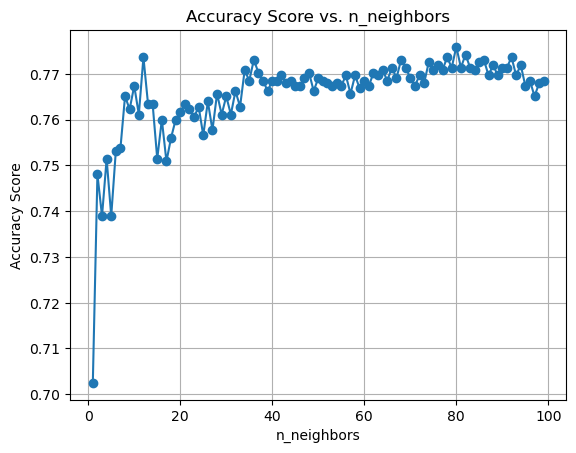

Highest Accuracy Score: 0.776 (n_neighbors=80)


In [174]:
from sklearn.neighbors import KNeighborsClassifier
#attempt at finding the best n neighbor value for euclidean using loop
# Define the range of n_ neighbors values
n_neighbors_values = range(1, 100)

# Create empty lists to store accuracy scores and n_ neighbors values
accuracy_scores = []
n_neighbors_values_list = []
highest_accuracy = 0.0

# Iterate over the n_ neighbors values
for n_neighbors in n_neighbors_values:
# Create the K-NN classifier
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric = "euclidean", p=2)
    classifier.fit(X_train, y_train)
# Make predictions on the test set
    y_pred = classifier.predict(X_test)
# Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
# Append accuracy score and n_neighbors value to the respective lists
    accuracy_scores.append(accuracy)
    n_neighbors_values_list.append(n_neighbors)
#find highest accuracy 
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_n_neighbors = n_neighbors
# Create the plot
plt.plot(n_neighbors_values_list, accuracy_scores, marker='o') 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. n_neighbors')
plt.grid(True)
plt.show()
print ("Highest Accuracy Score: {:.3f} (n_neighbors={})".format(highest_accuracy, best_n_neighbors))

In [144]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 26, metric = "euclidean", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=26)

In [165]:
y_pred = classifier.predict(X_test)
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
0,1,1
1,0,0
2,0,0
3,1,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


In [166]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Identifying TP, TN, FP, and FN
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cm)
# Display the accuracy score
print("Accuracy Score: {:0.3f}". format (accuracy_score (y_test, y_pred) ))

Confusion Matrix
 [[1086  196]
 [ 211  265]]
Accuracy Score: 0.768


In [147]:
from sklearn.metrics import classification_report
target_names = ['not churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not churn       0.81      0.94      0.87      1282
       churn       0.70      0.40      0.51       476

    accuracy                           0.79      1758
   macro avg       0.75      0.67      0.69      1758
weighted avg       0.78      0.79      0.77      1758



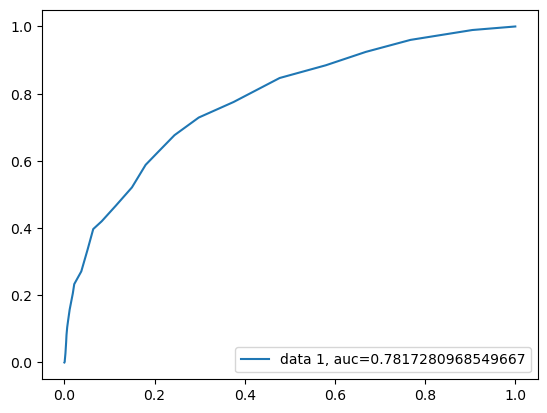

In [148]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [149]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, classifier.predict_proba(X_test))
logloss
#the lower the better 
# Log Loss around "0.5" considered the classification model reasonable enough

0.5862208656610745

In [196]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_train)


In [197]:
y_pred = naive_bayes_classifier.predict(X_test)
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
0,1,1
1,0,0
2,0,0
3,1,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


In [198]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Identifying TP, TN, FP, and FN
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cm)
# Display the accuracy score
print("Accuracy Score: {:0.3f}". format (accuracy_score (y_test, y_pred) ))

Confusion Matrix
 [[950 332]
 [128 348]]
Accuracy Score: 0.738


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)



Accuracy: 0.7758816837315131
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1282
           1       0.61      0.49      0.54       476

    accuracy                           0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.76      0.78      0.77      1758



In [22]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cm)
# Display the accuracy score
print("Accuracy Score: {:0.3f}". format (accuracy_score (y_test, y_pred) ))

Confusion Matrix
 [[1132  150]
 [ 244  232]]
Accuracy Score: 0.776


In [24]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, classifier.predict_proba(X_test))
logloss

NameError: name 'classifier' is not defined